In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# サンプルデータ
data = {
    '色': ['赤', '赤', '赤', '黄', '黄', '黄', '赤', '赤', '黄', '黄', '赤', '黄', '黄', '赤', '赤', '黄', '黄', '赤', '黄', '赤', '黄', '赤', '黄', '赤', '黄', '赤', '黄', '赤', '黄'],
    'サイズ': ['大', '大', '小', '大', '小', '小', '小', '大', '小', '大', '大', '大', '小', '小', '大', '小', '大', '小', '大', '大', '小', '小', '大', '大', '小', '大', '大', '小', '大'],
    'フルーツ': ['リンゴ', 'リンゴ', 'チェリー', 'バナナ', 'チェリー', 'バナナ', 'チェリー', 'リンゴ', 'バナナ', 'リンゴ', 'チェリー', 'バナナ', 'リンゴ', 'チェリー', 'バナナ', 'リンゴ', 'チェリー', 'リンゴ', 'バナナ', 'リンゴ', 'チェリー', 'バナナ', 'リンゴ', 'チェリー', 'バナナ', 'リンゴ', 'バナナ', 'チェリー', 'リンゴ']
}

dataset = pd.DataFrame(data)

# 特徴量と目的変数で分割
x = pd.get_dummies(dataset.iloc[:, :-1])
# ilocは行列の部分選択メソッドであり、この場合は(行全体,フルーツの列以外)を選択する。get_dummiesはone-hot encoding処理共に、新しいラベル(色_赤など)を自動付与
y = dataset.iloc[:, -1].values
#　(行全体, フルーツ列のみ)を選択。valuesはnumpy配列変換メソッド。
print("ワンホットエンコーディング後の特徴量テーブル")
print(x)
print("---"*10)
print("抽出した目的変数")
print(y)

# トレーニングデータとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 決定木モデルのトレーニング
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

# テストデータで予測
y_pred = classifier.predict(x_test)

# 混同行列の作成
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 精度の計算
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')

ワンホットエンコーディング後の特徴量テーブル
      色_赤    色_黄  サイズ_大  サイズ_小
0    True  False   True  False
1    True  False   True  False
2    True  False  False   True
3   False   True   True  False
4   False   True  False   True
5   False   True  False   True
6    True  False  False   True
7    True  False   True  False
8   False   True  False   True
9   False   True   True  False
10   True  False   True  False
11  False   True   True  False
12  False   True  False   True
13   True  False  False   True
14   True  False   True  False
15  False   True  False   True
16  False   True   True  False
17   True  False  False   True
18  False   True   True  False
19   True  False   True  False
20  False   True  False   True
21   True  False  False   True
22  False   True   True  False
23   True  False   True  False
24  False   True  False   True
25   True  False   True  False
26  False   True   True  False
27   True  False  False   True
28  False   True   True  False
------------------------------
抽出した目的変数
['リンゴ' 

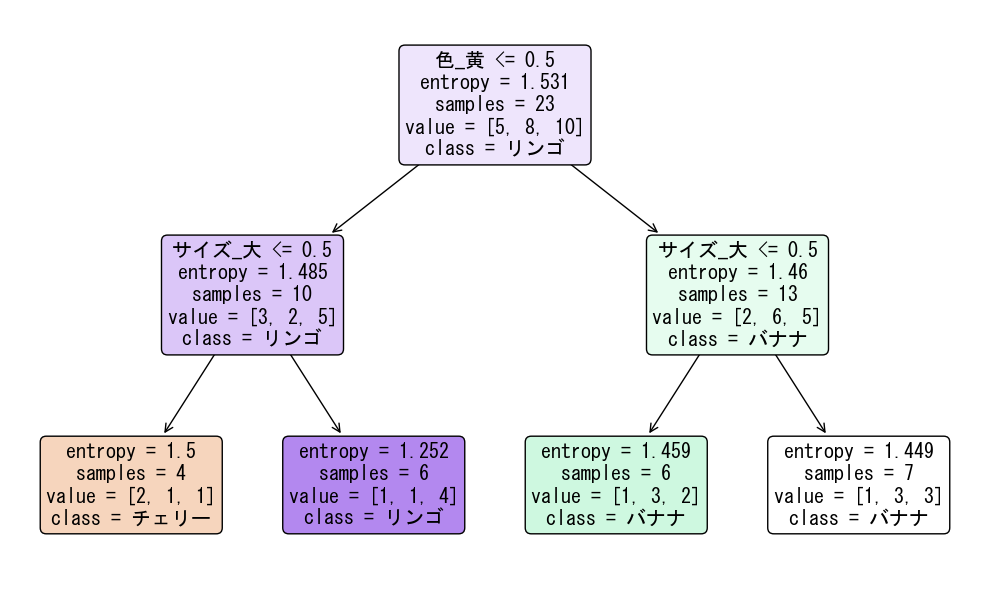

In [25]:
import matplotlib
import matplotlib.pyplot as plt

#日本語フォント対応
matplotlib.rcParams['font.family'] = 'MS Gothic'   
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plot_tree(
    classifier,
    feature_names=x.columns.tolist(),
    class_names=classifier.classes_.tolist(),#　classifier.classes_はfitすると自動生成される配列
    filled=True,# ノード色分け
    rounded=True# 角を丸く
)
plt.tight_layout(); plt.show()

#最初は黄色ではない条件で分岐、左の内部ノードは赤、右の内部ノードは黄と分類。なおTrueなら左へ分岐。
#内部ノードではサイズが小さいという条件で分岐させているため、葉ノードの左から(色:赤、サイズ:小)、(色:赤、サイズ:大)、(色:黄、サイズ:小)、(色:黄、サイズ:大)

#entropy：不純度。0に近いほど「単一クラスに近い」
#samples：そのノードに到達したサンプル数（訓練データ内）
#value = [バナナ, チェリー, リンゴ] の個数（class_namesの順）
#class：そのノードでの多数決クラス（予測ラベル）